# 🚗 Analyzing Selling Price of Used Cars


## Step 1: Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

sns.set_style("whitegrid")
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 2: Load the Dataset

In [7]:
# Load the dataset
try:
    df = pd.read_csv('output.csv', header=None)
    print(f"Dataset loaded successfully! Shape: {df.shape}")
    print(f"Number of columns: {df.shape[1]}")
except FileNotFoundError:
    print("Error: 'output.csv' not found. Please place the file in the current directory.")

Dataset loaded successfully! Shape: (205, 26)
Number of columns: 26


## Step 3: Assign Column Headers

Your dataset has 26 columns, so we need 26 headers.

In [8]:
# Complete list of 26 headers (matching your CSV columns)
headers = ["symboling", "normalized-losses", "make", 
           "fuel-type", "aspiration", "num-of-doors",
           "body-style", "drive-wheels", "engine-location",
           "wheel-base", "length", "width", "height", "curb-weight",
           "engine-type", "num-of-cylinders", "engine-size", 
           "fuel-system", "bore", "stroke", "compression-ratio",
           "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

# Check if number of headers matches number of columns
print(f"Number of headers: {len(headers)}")
print(f"Number of columns in dataframe: {df.shape[1]}")

if len(headers) == df.shape[1]:
    df.columns = headers
    print("✅ Column headers assigned successfully!")
else:
    print(f"❌ Mismatch: {len(headers)} headers vs {df.shape[1]} columns")

df.head()

Number of headers: 26
Number of columns in dataframe: 26
✅ Column headers assigned successfully!


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Step 4: Check for Missing Values

In [9]:
# Check for '?' which indicates missing data
print("Columns with '?' values:")
for col in df.columns:
    if df[col].dtype == object:
        missing_count = (df[col] == '?').sum()
        if missing_count > 0:
            print(f"- {col}: {missing_count} missing values ('?')")

Columns with '?' values:
- normalized-losses: 41 missing values ('?')
- num-of-doors: 2 missing values ('?')
- bore: 4 missing values ('?')
- stroke: 4 missing values ('?')
- horsepower: 2 missing values ('?')
- peak-rpm: 2 missing values ('?')
- price: 4 missing values ('?')


## Step 5: Data Cleaning

In [10]:
# Create a copy to work on
data = df.copy()

# Convert city-mpg to L/100km (235 / mpg)
# First, convert 'city-mpg' column to numeric, coercing errors
data['city-mpg'] = pd.to_numeric(data['city-mpg'], errors='coerce')
data['city-mpg'] = 235 / data['city-mpg']
data.rename(columns={'city-mpg': 'city-L/100km'}, inplace=True)

# Check the unique values in the price column
print("Unique values in 'price' before cleaning:")
print(data['price'].unique()[:20])  # Show first 20 unique values
print(f"\nTotal rows before cleaning: {len(data)}")

Unique values in 'price' before cleaning:
['13495' '16500' '13950' '17450' '15250' '17710' '18920' '23875' '?'
 '16430' '16925' '20970' '21105' '24565' '30760' '41315' '36880' '5151'
 '6295' '6575']

Total rows before cleaning: 205


In [11]:
# Remove rows where price is '?' and convert to integer
data = data[data['price'] != '?']
data['price'] = data['price'].astype(int)

print(f"Dataset shape after removing rows with missing price: {data.shape}")
print(f"Price range: ${data['price'].min()} - ${data['price'].max()}")
print(f"Average price: ${data['price'].mean():.2f}")

Dataset shape after removing rows with missing price: (201, 26)
Price range: $5118 - $45400
Average price: $13207.13


## Step 6: Convert Numeric Columns

In [12]:
# List of columns that should be numeric
numeric_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print("Numeric columns converted. Check data types:")
data.dtypes

Numeric columns converted. Check data types:


symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-L/100km         float64
highway-mpg            int64
price                  int64
dtype: object

## Step 7: Feature Normalization and Binning

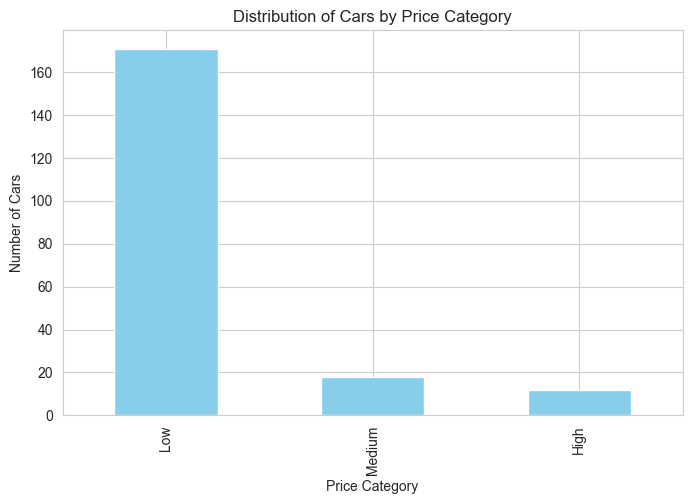


Price categories:
price-binned
Low       171
Medium     18
High       12
Name: count, dtype: int64


In [13]:
# Normalize length, width, height to a 0-1 range
data['length'] = data['length'] / data['length'].max()
data['width'] = data['width'] / data['width'].max()
data['height'] = data['height'] / data['height'].max()

# Create price bins (4 bins -> 3 groups: Low, Medium, High)
bins = np.linspace(min(data['price']), max(data['price']), 4)
group_names = ['Low', 'Medium', 'High']
data['price-binned'] = pd.cut(data['price'], bins, labels=group_names, include_lowest=True)

# Visualize the bins
plt.figure(figsize=(8,5))
data['price-binned'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Cars by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Number of Cars')
plt.show()

print("\nPrice categories:")
print(data['price-binned'].value_counts())

## Step 8: Data Visualization

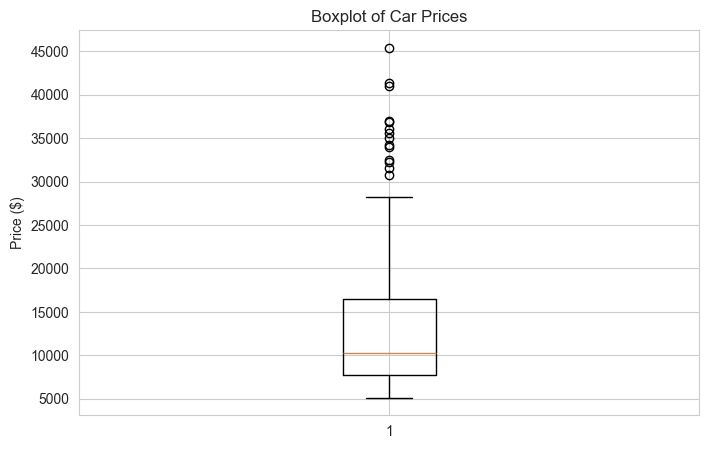

In [14]:
# Boxplot of price
plt.figure(figsize=(8,5))
plt.boxplot(data['price'])
plt.title('Boxplot of Car Prices')
plt.ylabel('Price ($)')
plt.show()

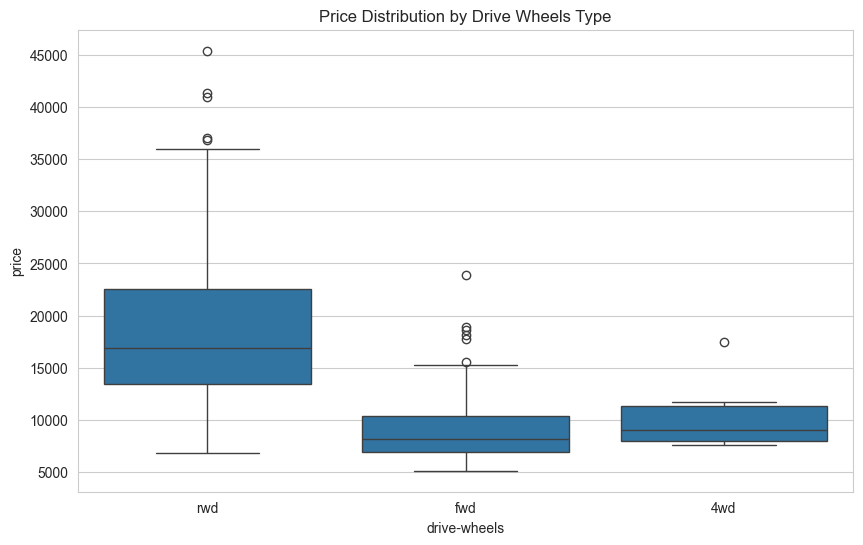

In [15]:
# Boxplot of price by drive-wheels type
plt.figure(figsize=(10,6))
sns.boxplot(x='drive-wheels', y='price', data=data)
plt.title('Price Distribution by Drive Wheels Type')
plt.show()

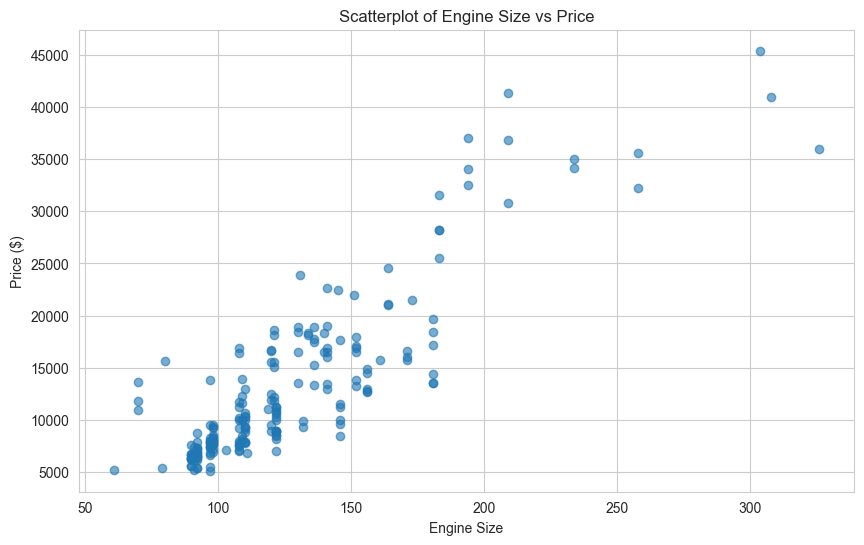

In [16]:
# Scatter plot: Engine size vs Price
plt.figure(figsize=(10,6))
plt.scatter(data['engine-size'], data['price'], alpha=0.6)
plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

## Step 9: Grouping and Pivot Tables

In [17]:
# Group by drive-wheels and body-style
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()

print("Average price by drive-wheels and body-style:")
data_grp

Average price by drive-wheels and body-style:


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Pivot table of average prices:


body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


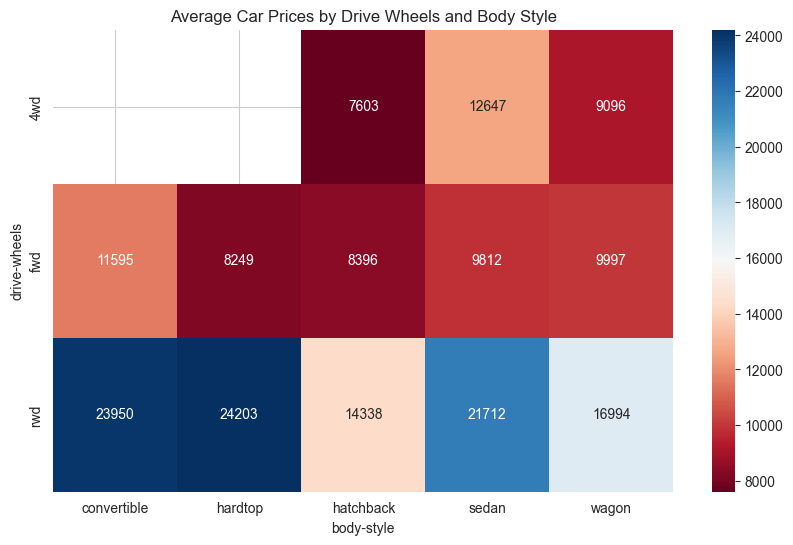

In [18]:
# Create a pivot table
try:
    data_pivot = data_grp.pivot(index='drive-wheels', columns='body-style', values='price')
    print("Pivot table of average prices:")
    display(data_pivot)
    
    # Visualize as heatmap
    plt.figure(figsize=(10,6))
    sns.heatmap(data_pivot, annot=True, cmap='RdBu', fmt='.0f')
    plt.title('Average Car Prices by Drive Wheels and Body Style')
    plt.show()
except Exception as e:
    print(f"Could not create pivot table: {e}")

## Step 10: Statistical Analysis - ANOVA Test

In [20]:
# Alternative: Filter the dataframe directly instead of using get_group
honda_prices = data[data['make'] == 'honda']['price']
subaru_prices = data[data['make'] == 'subaru']['price']

if len(honda_prices) > 0 and len(subaru_prices) > 0:
    anova_results = sp.stats.f_oneway(honda_prices, subaru_prices)
    print("ANOVA test results (Honda vs Subaru):")
    print(f"F-statistic: {anova_results.statistic:.4f}")
    print(f"P-value: {anova_results.pvalue:.4f}")
    
    if anova_results.pvalue < 0.05:
        print("✅ Conclusion: There is a significant price difference between Honda and Subaru.")
    else:
        print("❌ Conclusion: No significant price difference found.")
        
    print(f"\nAverage Honda price: ${honda_prices.mean():.2f} (n={len(honda_prices)})")
    print(f"Average Subaru price: ${subaru_prices.mean():.2f} (n={len(subaru_prices)})")
else:
    print("Honda or Subaru data not found in dataset")

ANOVA test results (Honda vs Subaru):
F-statistic: 0.1974
P-value: 0.6609
❌ Conclusion: No significant price difference found.

Average Honda price: $8184.69 (n=13)
Average Subaru price: $8541.25 (n=12)


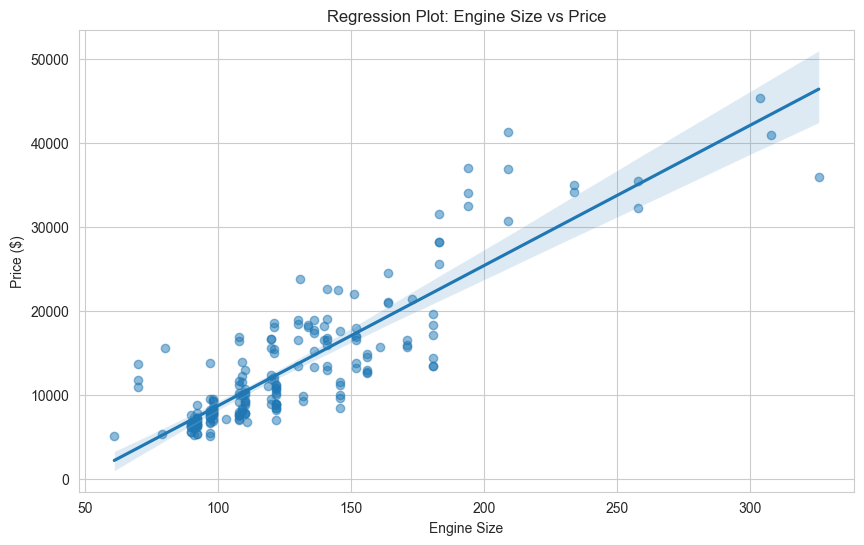

In [21]:
# Regression plot: Engine size vs Price
plt.figure(figsize=(10,6))
sns.regplot(x='engine-size', y='price', data=data, scatter_kws={'alpha':0.5})
plt.title('Regression Plot: Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.show()

## Summary Statistics

In [22]:
# Final summary
print("="*50)
print("FINAL SUMMARY")
print("="*50)
print(f"Total cars analyzed: {len(data)}")
print(f"Price range: ${data['price'].min():,} - ${data['price'].max():,}")
print(f"Average price: ${data['price'].mean():,.2f}")
print(f"Median price: ${data['price'].median():,.2f}")
print("\nTop 5 most expensive cars:")
print(data.nlargest(5, 'price')[['make', 'body-style', 'price']])
print("\nTop 5 most affordable cars:")
print(data.nsmallest(5, 'price')[['make', 'body-style', 'price']])

FINAL SUMMARY
Total cars analyzed: 201
Price range: $5,118 - $45,400
Average price: $13,207.13
Median price: $10,295.00

Top 5 most expensive cars:
              make   body-style  price
74   mercedes-benz      hardtop  45400
16             bmw        sedan  41315
73   mercedes-benz        sedan  40960
128        porsche  convertible  37028
17             bmw        sedan  36880

Top 5 most affordable cars:
           make body-style  price
138      subaru  hatchback   5118
18    chevrolet  hatchback   5151
50        mazda  hatchback   5195
150      toyota  hatchback   5348
76   mitsubishi  hatchback   5389
